In [111]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df=pd.read_csv("C:/Users/HA/Desktop/projetML/data/final_data.csv")

In [113]:
df.head()

,marque,modèle,Puissance fiscale,Année,price,Carburant,Kilométrage
0,Opel,Astra,7,2009,74000,Diesel,249000.0
1,Mercedes,Classe c,9,2016,330000,Diesel,169000.0
2,Volvo,S40,6,2011,110000,Diesel,140000.0
3,Mini,One,7,2016,145000,Essence,49000.0
4,Land-rover,Range rover sport,12,2019,750000,Diesel,54000.0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24321 entries, 0 to 24320
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             24321 non-null  object 
 1   modèle             24321 non-null  object 
 2   Puissance fiscale  24321 non-null  int64  
 3   Année              24321 non-null  int64  
 4   price              24321 non-null  int64  
 5   Carburant          24321 non-null  object 
 6   Kilométrage        24321 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [115]:
df = df.drop(columns=['modèle'])


In [116]:
duplicates = df[df.duplicated()]
print(duplicates)

           marque  Puissance fiscale  Année   price Carburant  Kilométrage
145      Mercedes                 36   2011  240000   Essence     179000.0
215    Volkswagen                  8   2023  348000    Diesel      44000.0
281    Volkswagen                  8   2020  315000    Diesel      59000.0
450          Ford                  8   2017  165000    Diesel     197000.0
534       Hyundai                 10   2018  165000    Diesel     100000.0
...           ...                ...    ...     ...       ...          ...
20844        Audi                  6   2015  410000    Diesel     104999.5
22146       Dacia                  8   2019  160000    Diesel     134999.5
23427        Opel                  6   2022  130000    Diesel      82499.5
23528       Dacia                  8   2016  161000    Diesel      22499.5
24137     Renault                  8   2016  118000    Diesel     154999.5

[260 rows x 6 columns]


In [117]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(260)

In [118]:
df = df.drop_duplicates()

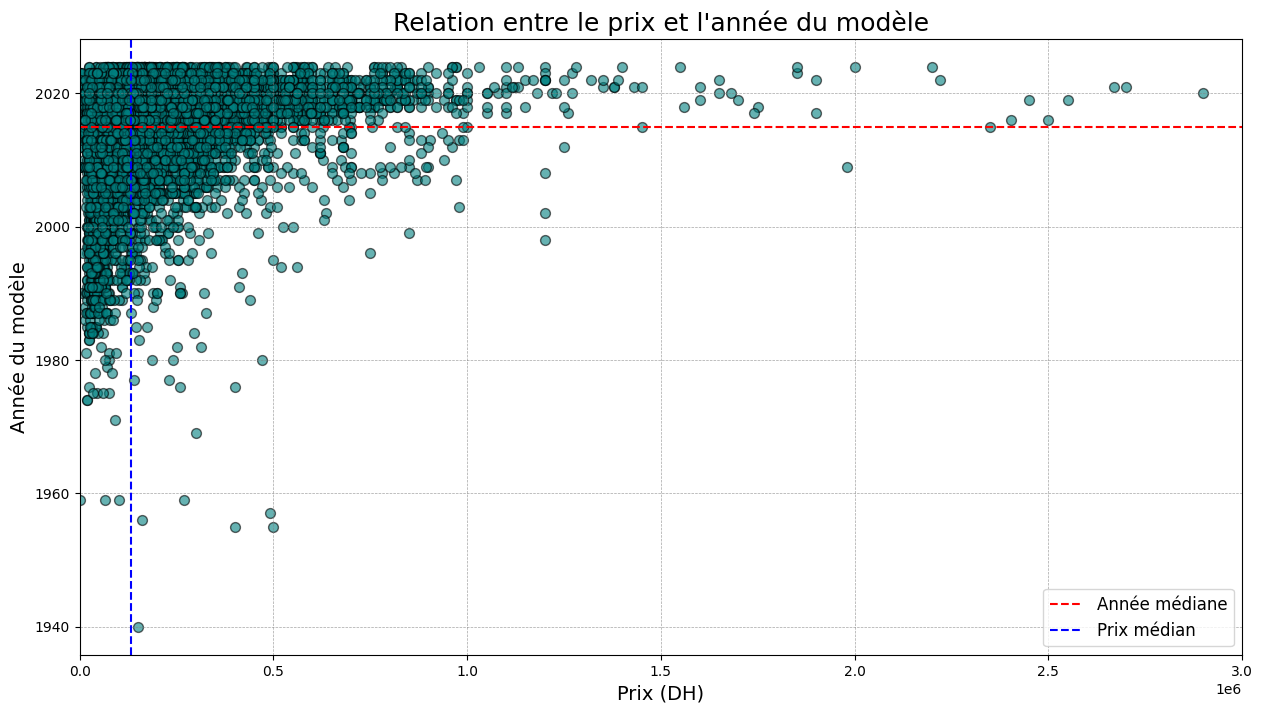

In [119]:
plt.figure(figsize=(15, 8))

# Scatter plot avec couleur et transparence
plt.scatter(df['price'], df['Année'], alpha=0.6, c='teal', edgecolor='k', s=50)

# Ajouter des labels et un titre
plt.xlabel("Prix (DH)", fontsize=14)
plt.ylabel("Année du modèle", fontsize=14)
plt.title("Relation entre le prix et l'année du modèle", fontsize=18)

# Définir les limites de l'axe des x pour afficher les prix entre 0 et 3 000 000
plt.xlim(0, 3000000)

# Ajouter une grille
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mettre en évidence les tendances (optionnel)
plt.axhline(y=df['Année'].median(), color='red', linestyle='--', label='Année médiane')
plt.axvline(x=df['price'].median(), color='blue', linestyle='--', label='Prix médian')

# Ajouter une légende
plt.legend(fontsize=12)

# Afficher le graphique
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_45392\1365995690.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Année', y='price', data=df, showfliers=False, palette="coolwarm")


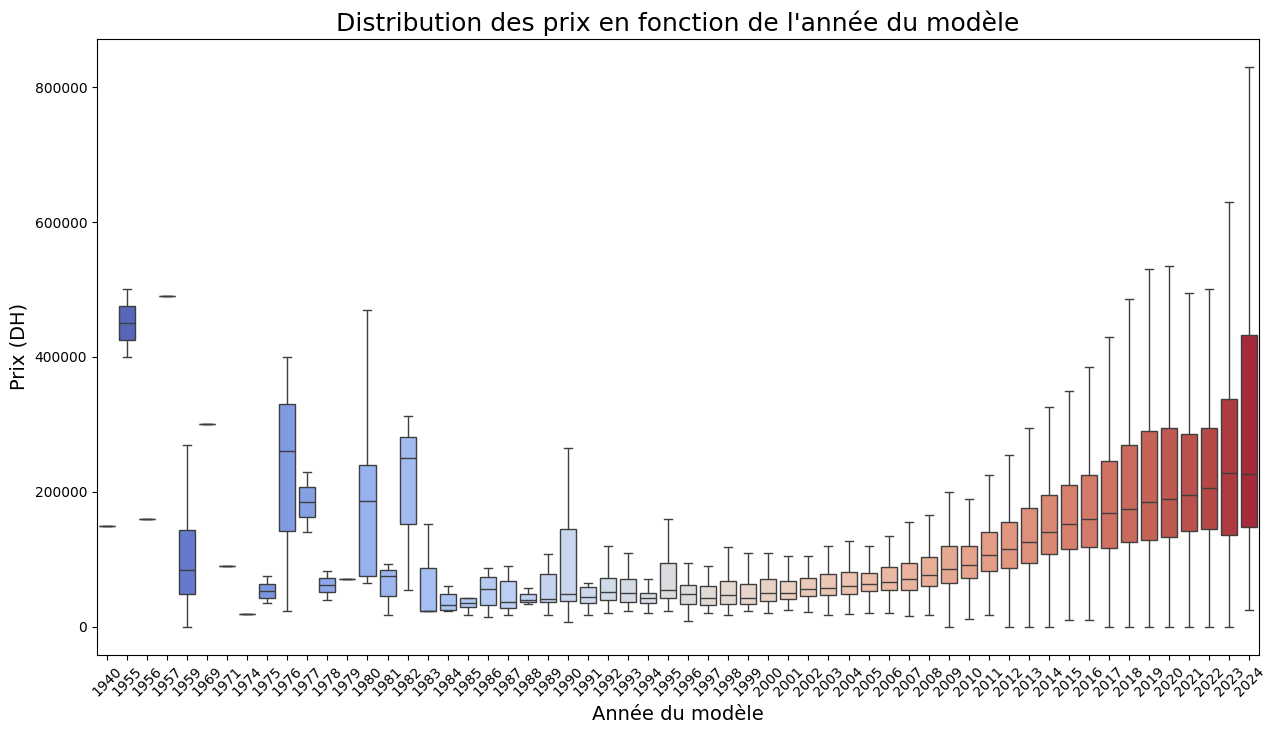

In [120]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# Box plot pour les prix en fonction de l'année
sns.boxplot(x='Année', y='price', data=df, showfliers=False, palette="coolwarm")

# Labels et titre
plt.xlabel("Année du modèle", fontsize=14)
plt.ylabel("Prix (DH)", fontsize=14)
plt.title("Distribution des prix en fonction de l'année du modèle", fontsize=18)

# Rotation des labels de l'axe x pour lisibilité
plt.xticks(rotation=45)
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_45392\419650691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


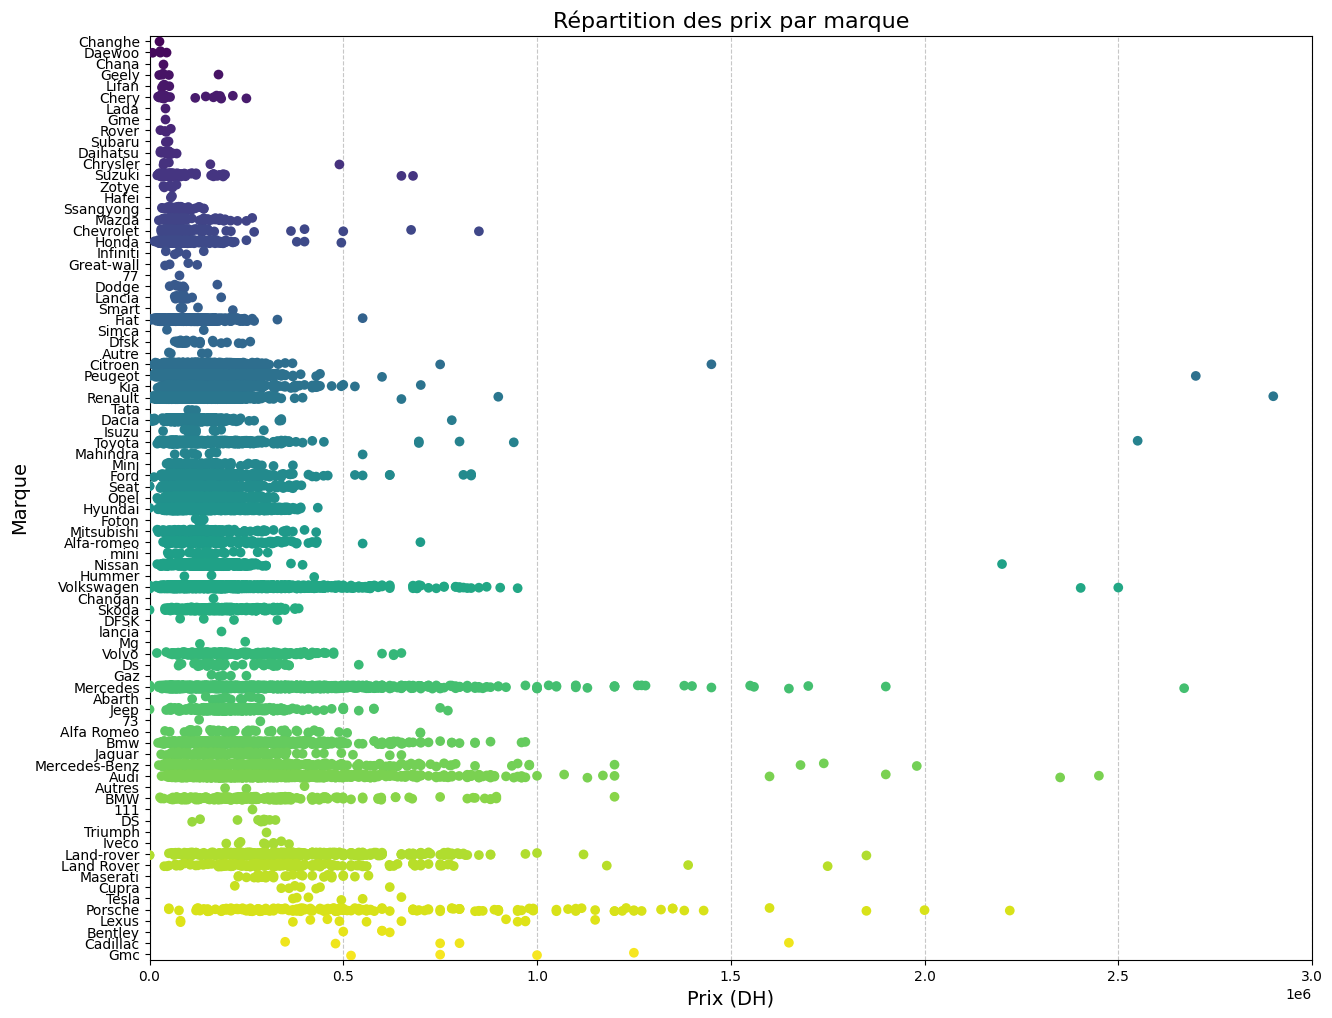

In [121]:
order = df.groupby('marque')['price'].median().sort_values().index
# Création du graphique
f, ax = plt.subplots(figsize=(15, 12))
plt.xlim(0, 3000000)

# Utilisation de stripplot avec des améliorations
sns.stripplot(
    data=df, 
    x='price', 
    y='marque', 
    jitter=0.15,  # Réduire le jitter pour éviter un chevauchement excessif
    size=7,  # Ajuster la taille des points pour plus de clarté
    palette="viridis",  # Palette de couleurs pour un visuel esthétique
    order=order  # Trier les marques par ordre de médiane des prix
)

# Ajout des labels et du titre
plt.xlabel("Prix (DH)", fontsize=14)
plt.ylabel("Marque", fontsize=14)
plt.title("Répartition des prix par marque", fontsize=16)

# Affichage des grilles pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_45392\3596408748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\HA\AppData\Local\Temp\ipykernel_45392\3596408748.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\HA\AppData\Local\Temp\ipykernel_45392\3596408748.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


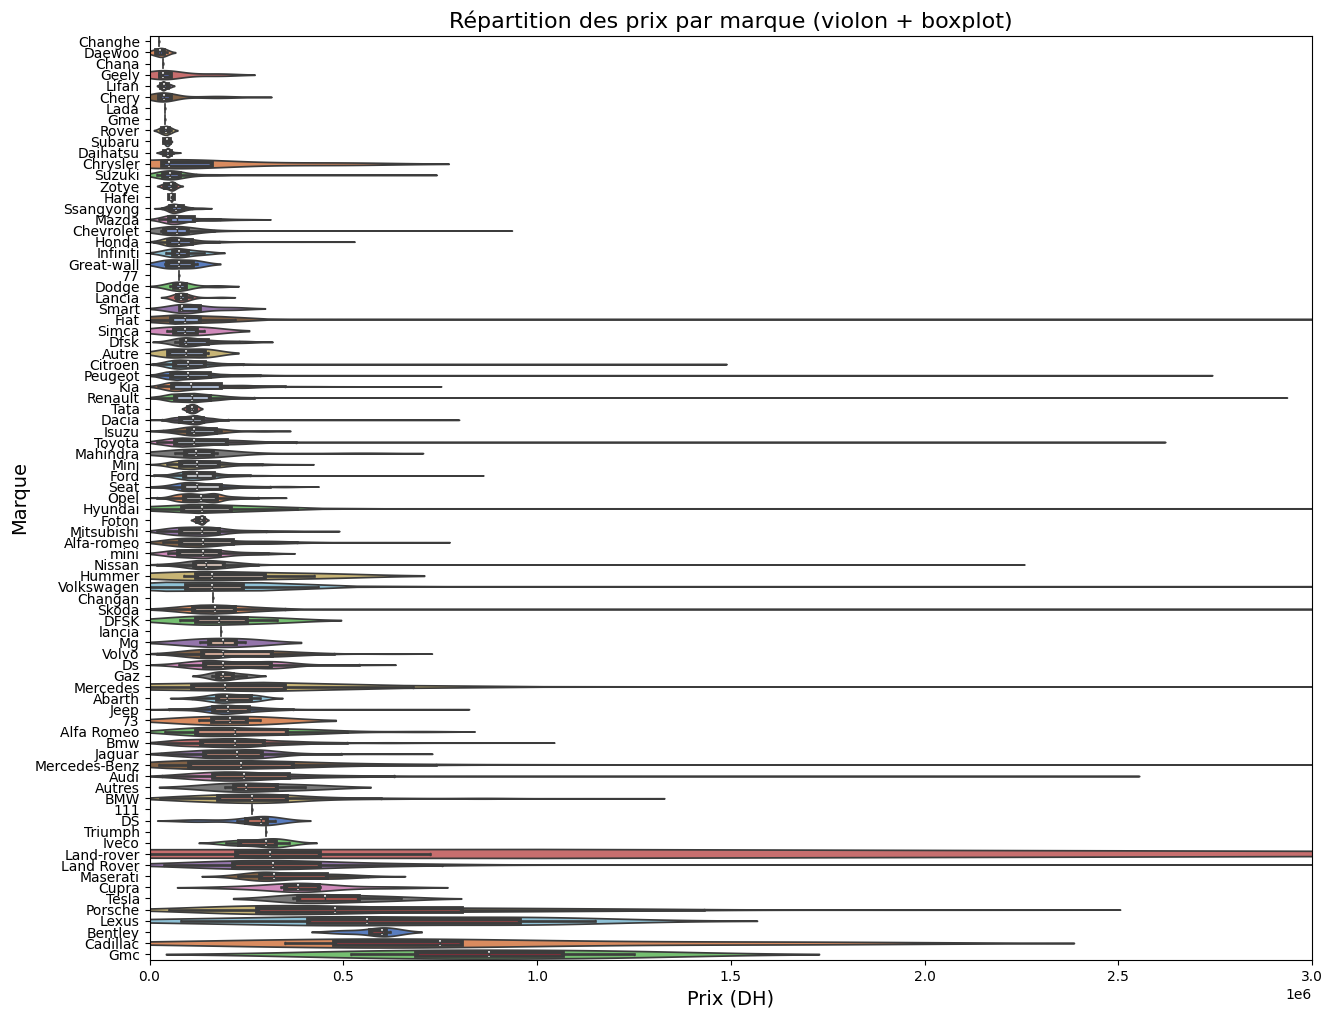

In [122]:
order = df.groupby('marque')['price'].median().sort_values().index

# Taille de la figure
plt.figure(figsize=(15, 12))

# Graphique en violon
sns.violinplot(
    data=df,
    x='price',
    y='marque',
    scale='width',  # Ajuster la largeur en fonction de la densité
    palette="muted",
    order=order  # Trier les marques
)

# Ajouter le boxplot pour la médiane et les quartiles
sns.boxplot(
    data=df,
    x='price',
    y='marque',
    width=0.2,  # Réduire la largeur du boxplot
    palette="coolwarm",
    order=order,
    showfliers=False  # Cacher les valeurs aberrantes pour éviter trop de surcharge
)

# Ajouter des labels et un titre
plt.xlabel("Prix (DH)", fontsize=14)
plt.ylabel("Marque", fontsize=14)
plt.title("Répartition des prix par marque (violon + boxplot)", fontsize=16)

# Limiter la plage des prix
plt.xlim(0, 3000000)

# Afficher le graphique
plt.show()

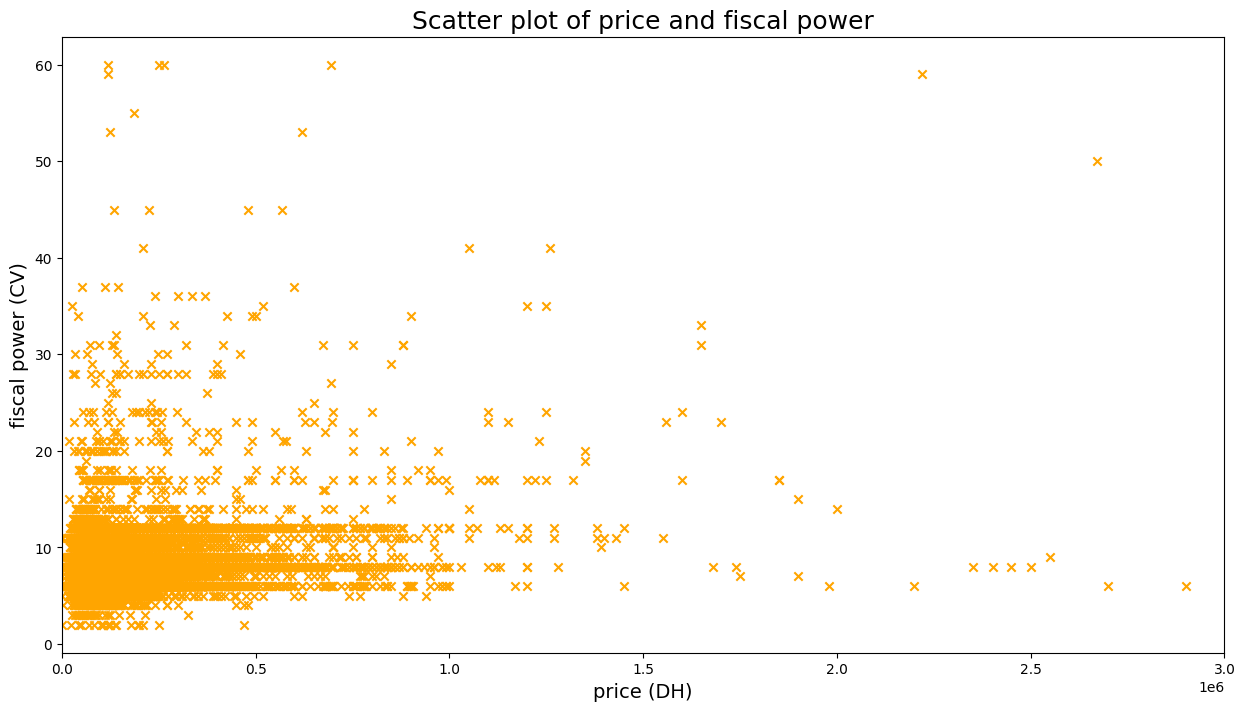

In [123]:
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.price, df["Puissance fiscale"], c='orange', marker='x')
plt.xlim(0, 3000000)
plt.xlabel("price (DH)", fontsize=14)
plt.ylabel("fiscal power (CV)", fontsize=14)
plt.title("Scatter plot of price and fiscal power",fontsize=18)
plt.show()

In [124]:
print('The length of unique marks feature is',len(df.marque.unique()))

The length of unique marks feature is 83


In [125]:
df.marque.value_counts().nlargest(20)

marque
Volkswagen       2956
Renault          2282
Peugeot          1742
Dacia            1616
Ford             1533
Mercedes         1517
Hyundai          1416
Audi             1132
Fiat             1085
Citroen           876
Bmw               826
Opel              695
Toyota            673
Kia               623
Nissan            566
Land-rover        478
Seat              409
Jeep              383
Skoda             372
Mercedes-Benz     335
Name: count, dtype: int64

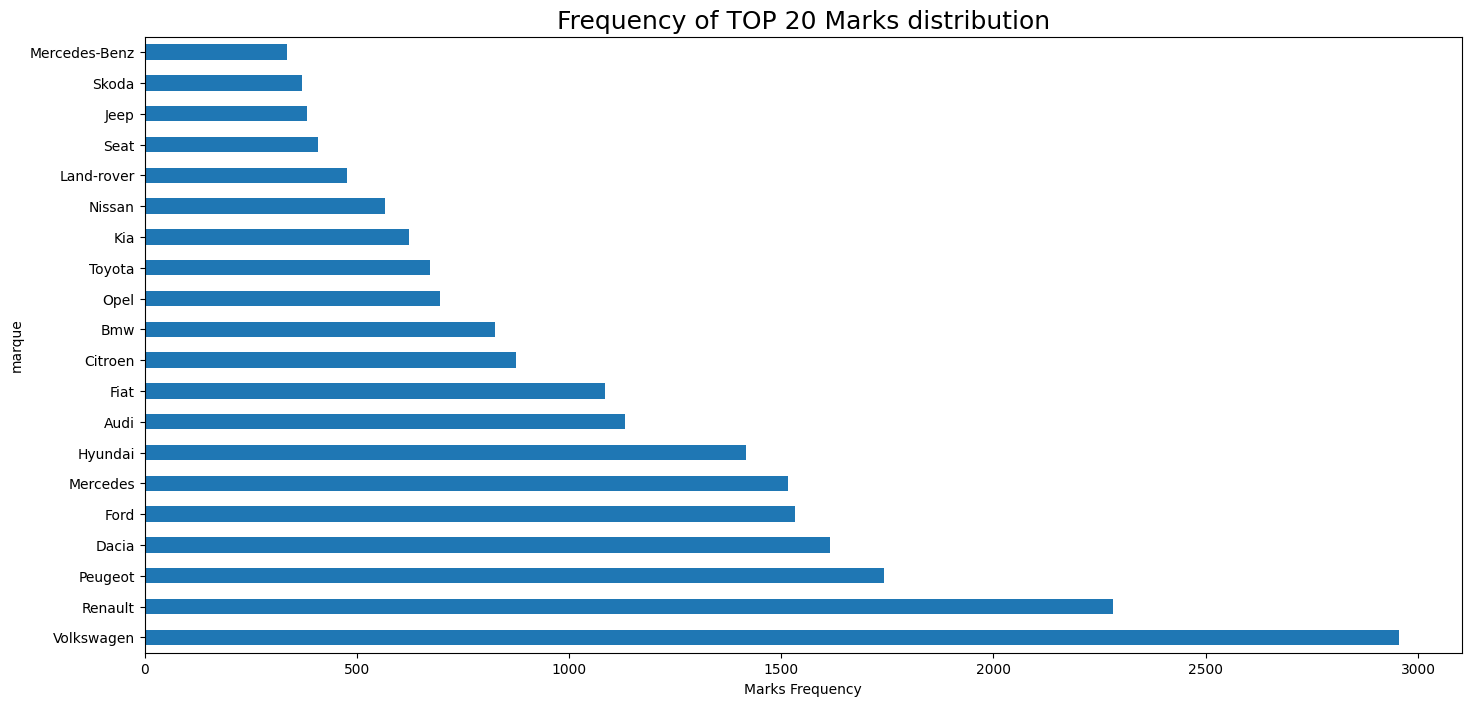

In [126]:
plt.figure(figsize=(17,8))
df.marque.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of TOP 20 Marks distribution",fontsize=18)
plt.show()

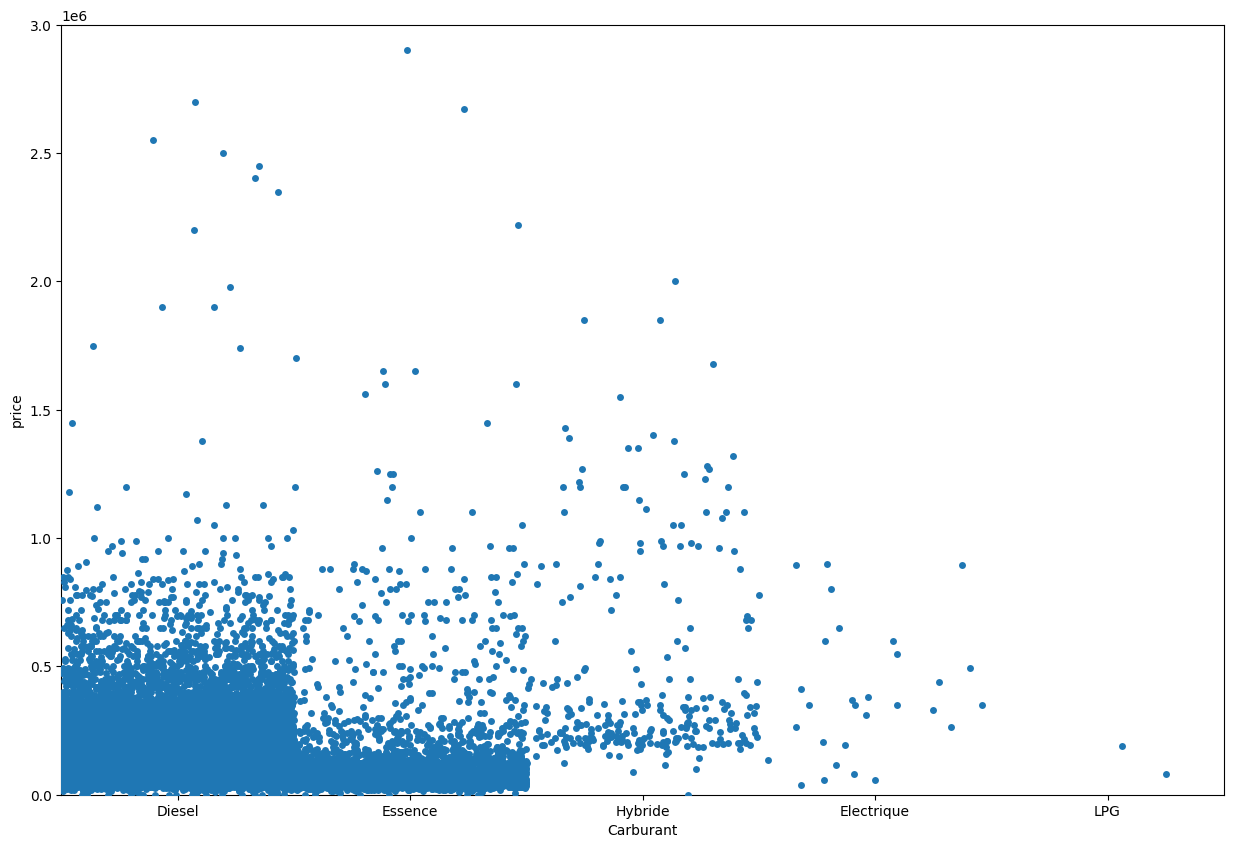

In [127]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Carburant', y='price', jitter=.5)
plt.ylim(0, 3000000)
plt.show()

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

In [130]:
X = df[['Année', 'Kilométrage', 'Puissance fiscale', 'Carburant', 'marque']]
Y=df.price
X = pd.get_dummies(data=X,dtype=int)
X

,Année,Kilométrage,Puissance fiscale,Carburant_Diesel,Carburant_Electrique,Carburant_Essence,Carburant_Hybride,Carburant_LPG,marque_111,marque_73,...,marque_Suzuki,marque_Tata,marque_Tesla,marque_Toyota,marque_Triumph,marque_Volkswagen,marque_Volvo,marque_Zotye,marque_lancia,marque_mini
0,2009,249000.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,169000.0,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,140000.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2016,49000.0,7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,54000.0,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24316,2009,67499.5,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24317,2020,67499.5,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24318,2016,184999.5,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24319,2013,194999.5,6,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24061 entries, 0 to 24320
Data columns (total 91 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Année                 24061 non-null  int64  
 1   Kilométrage           24061 non-null  float64
 2   Puissance fiscale     24061 non-null  int64  
 3   Carburant_Diesel      24061 non-null  int64  
 4   Carburant_Electrique  24061 non-null  int64  
 5   Carburant_Essence     24061 non-null  int64  
 6   Carburant_Hybride     24061 non-null  int64  
 7   Carburant_LPG         24061 non-null  int64  
 8   marque_111            24061 non-null  int64  
 9   marque_73             24061 non-null  int64  
 10  marque_77             24061 non-null  int64  
 11  marque_Abarth         24061 non-null  int64  
 12  marque_Alfa Romeo     24061 non-null  int64  
 13  marque_Alfa-romeo     24061 non-null  int64  
 14  marque_Audi           24061 non-null  int64  
 15  marque_Autre          24

In [132]:
columns = X.columns

# Filtrer les colonnes qui contiennent le mot 'marque'
modèles_encodées = [col for col in columns if 'modèle' in col]

# Afficher les modèles encodées
print(modèles_encodées)

[]


In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [134]:
X_train.shape

(19248, 91)

C:\Users\HA\AppData\Local\Temp\ipykernel_45392\2888050836.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


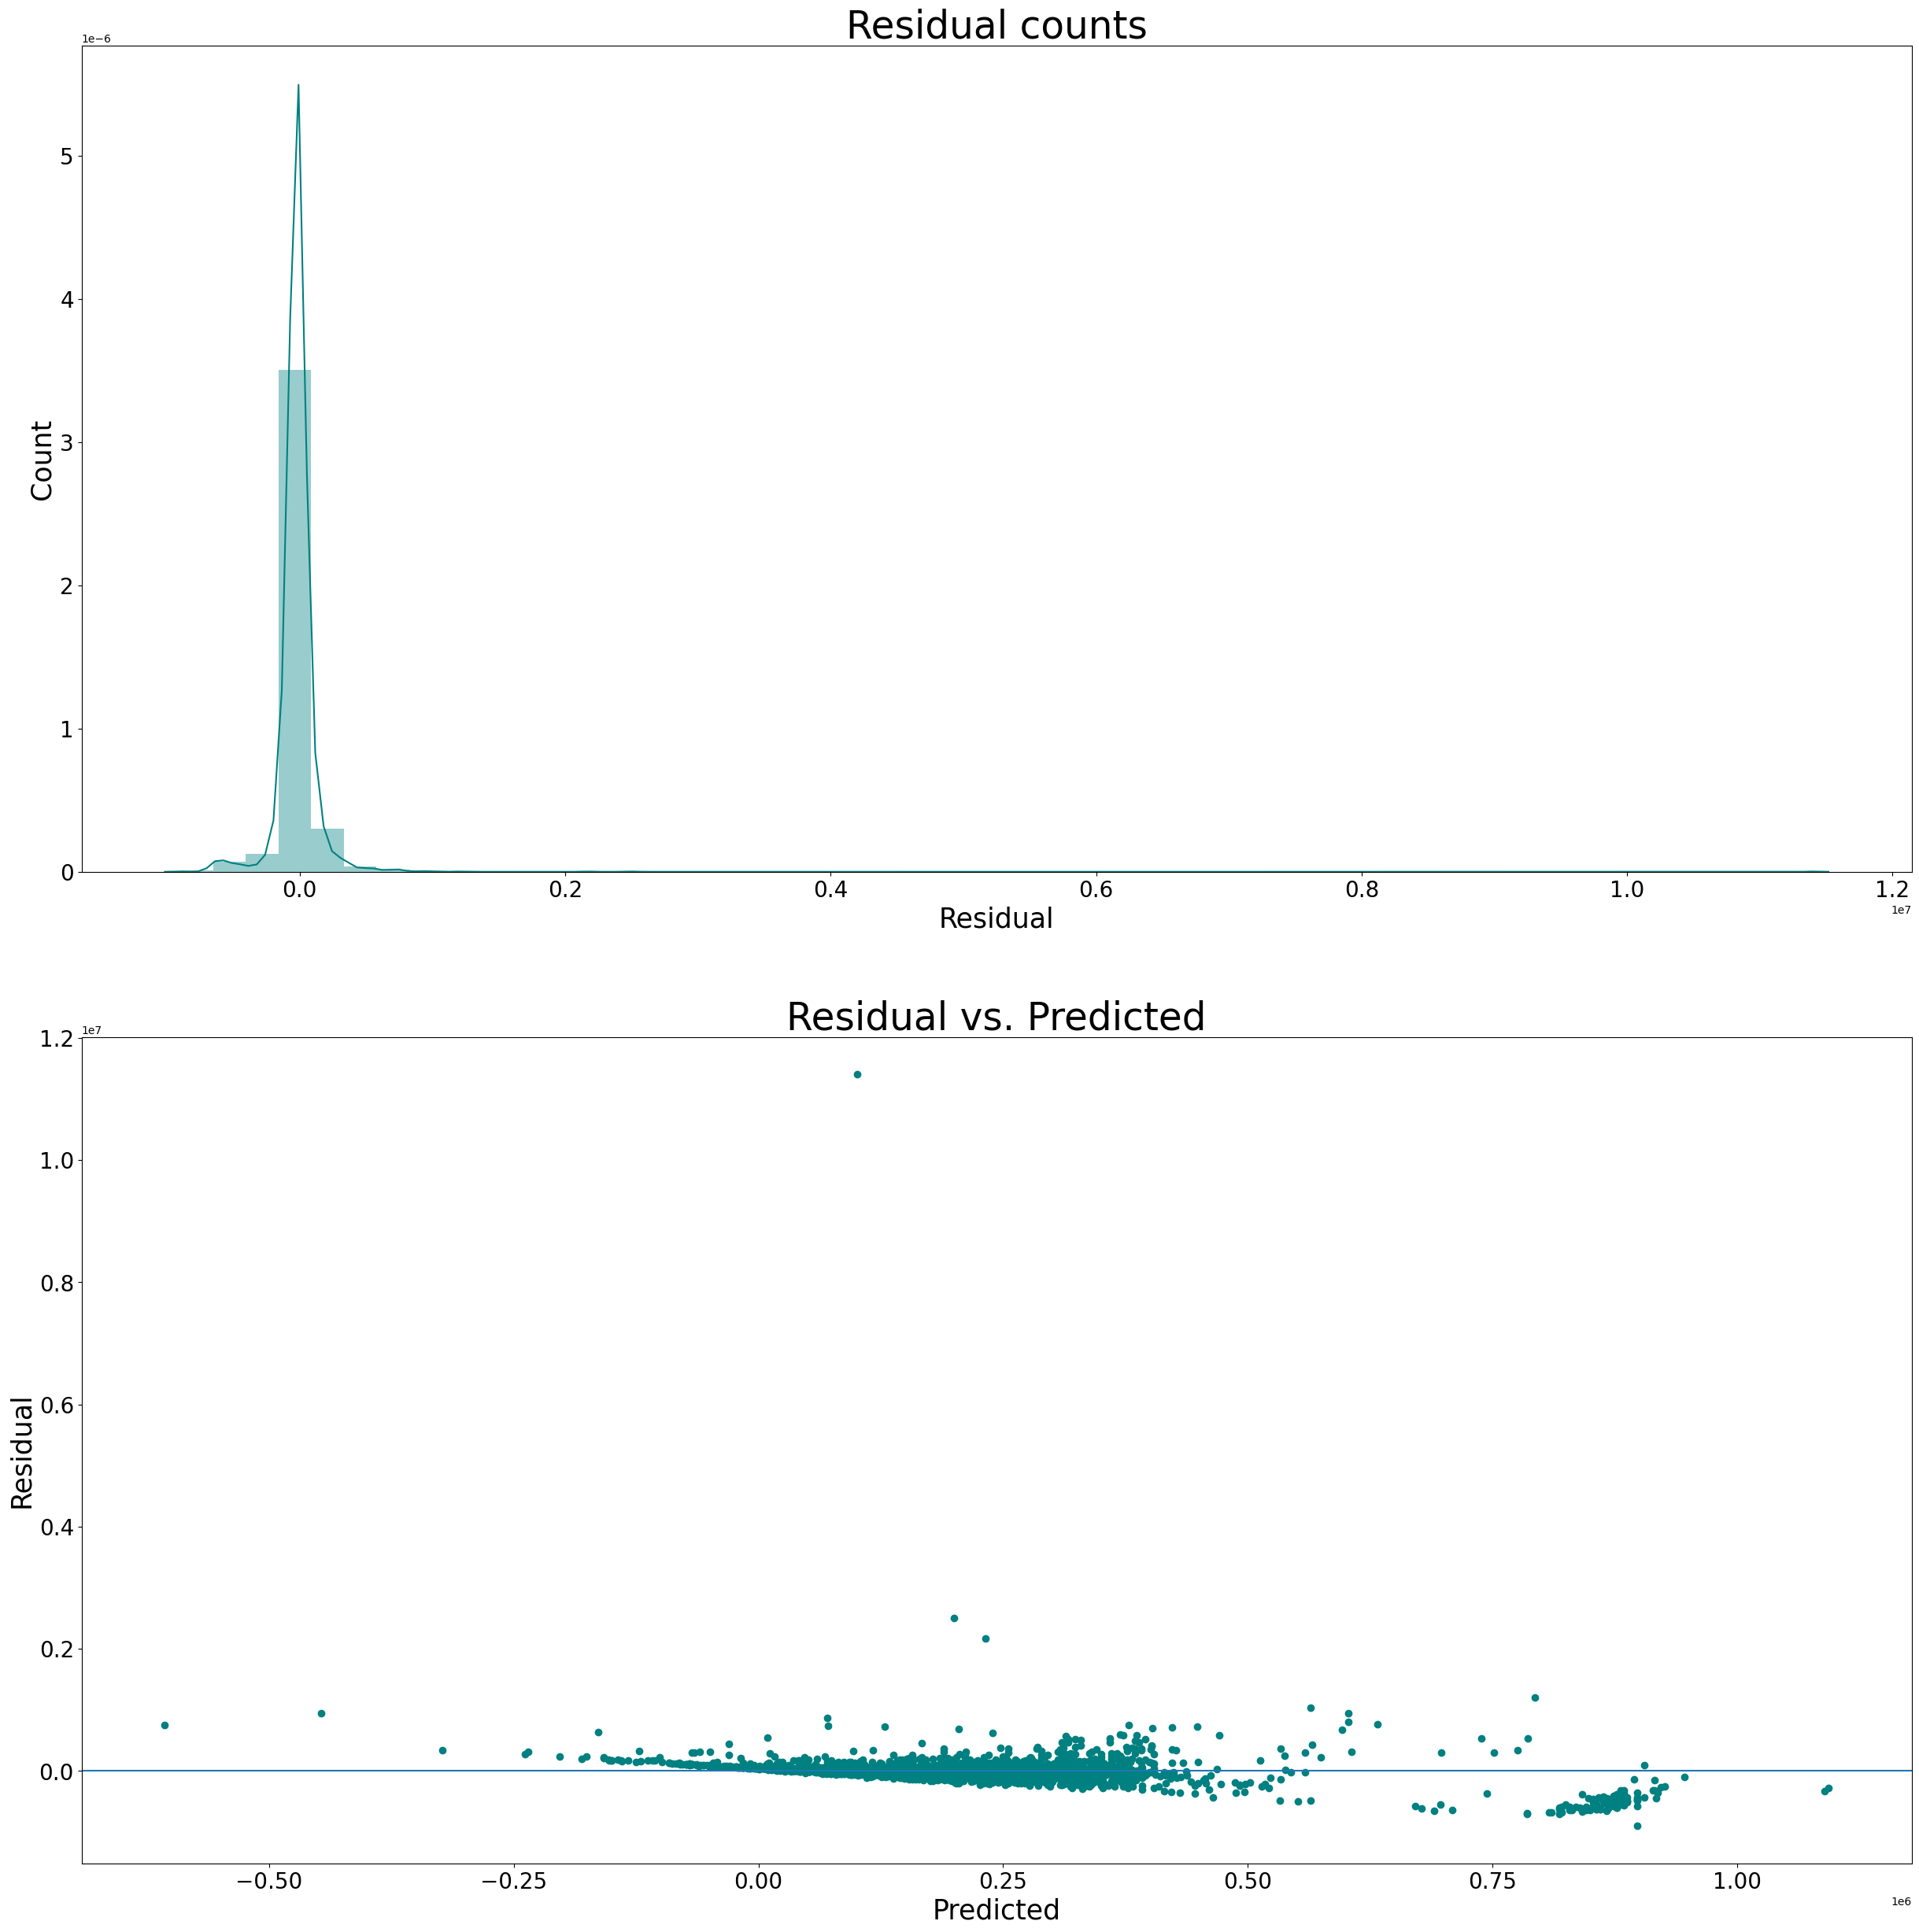

RMSE:
214814.6929582735
Variance score: 0.06


In [135]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

C:\Users\HA\AppData\Local\Temp\ipykernel_45392\3910724377.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='orange')


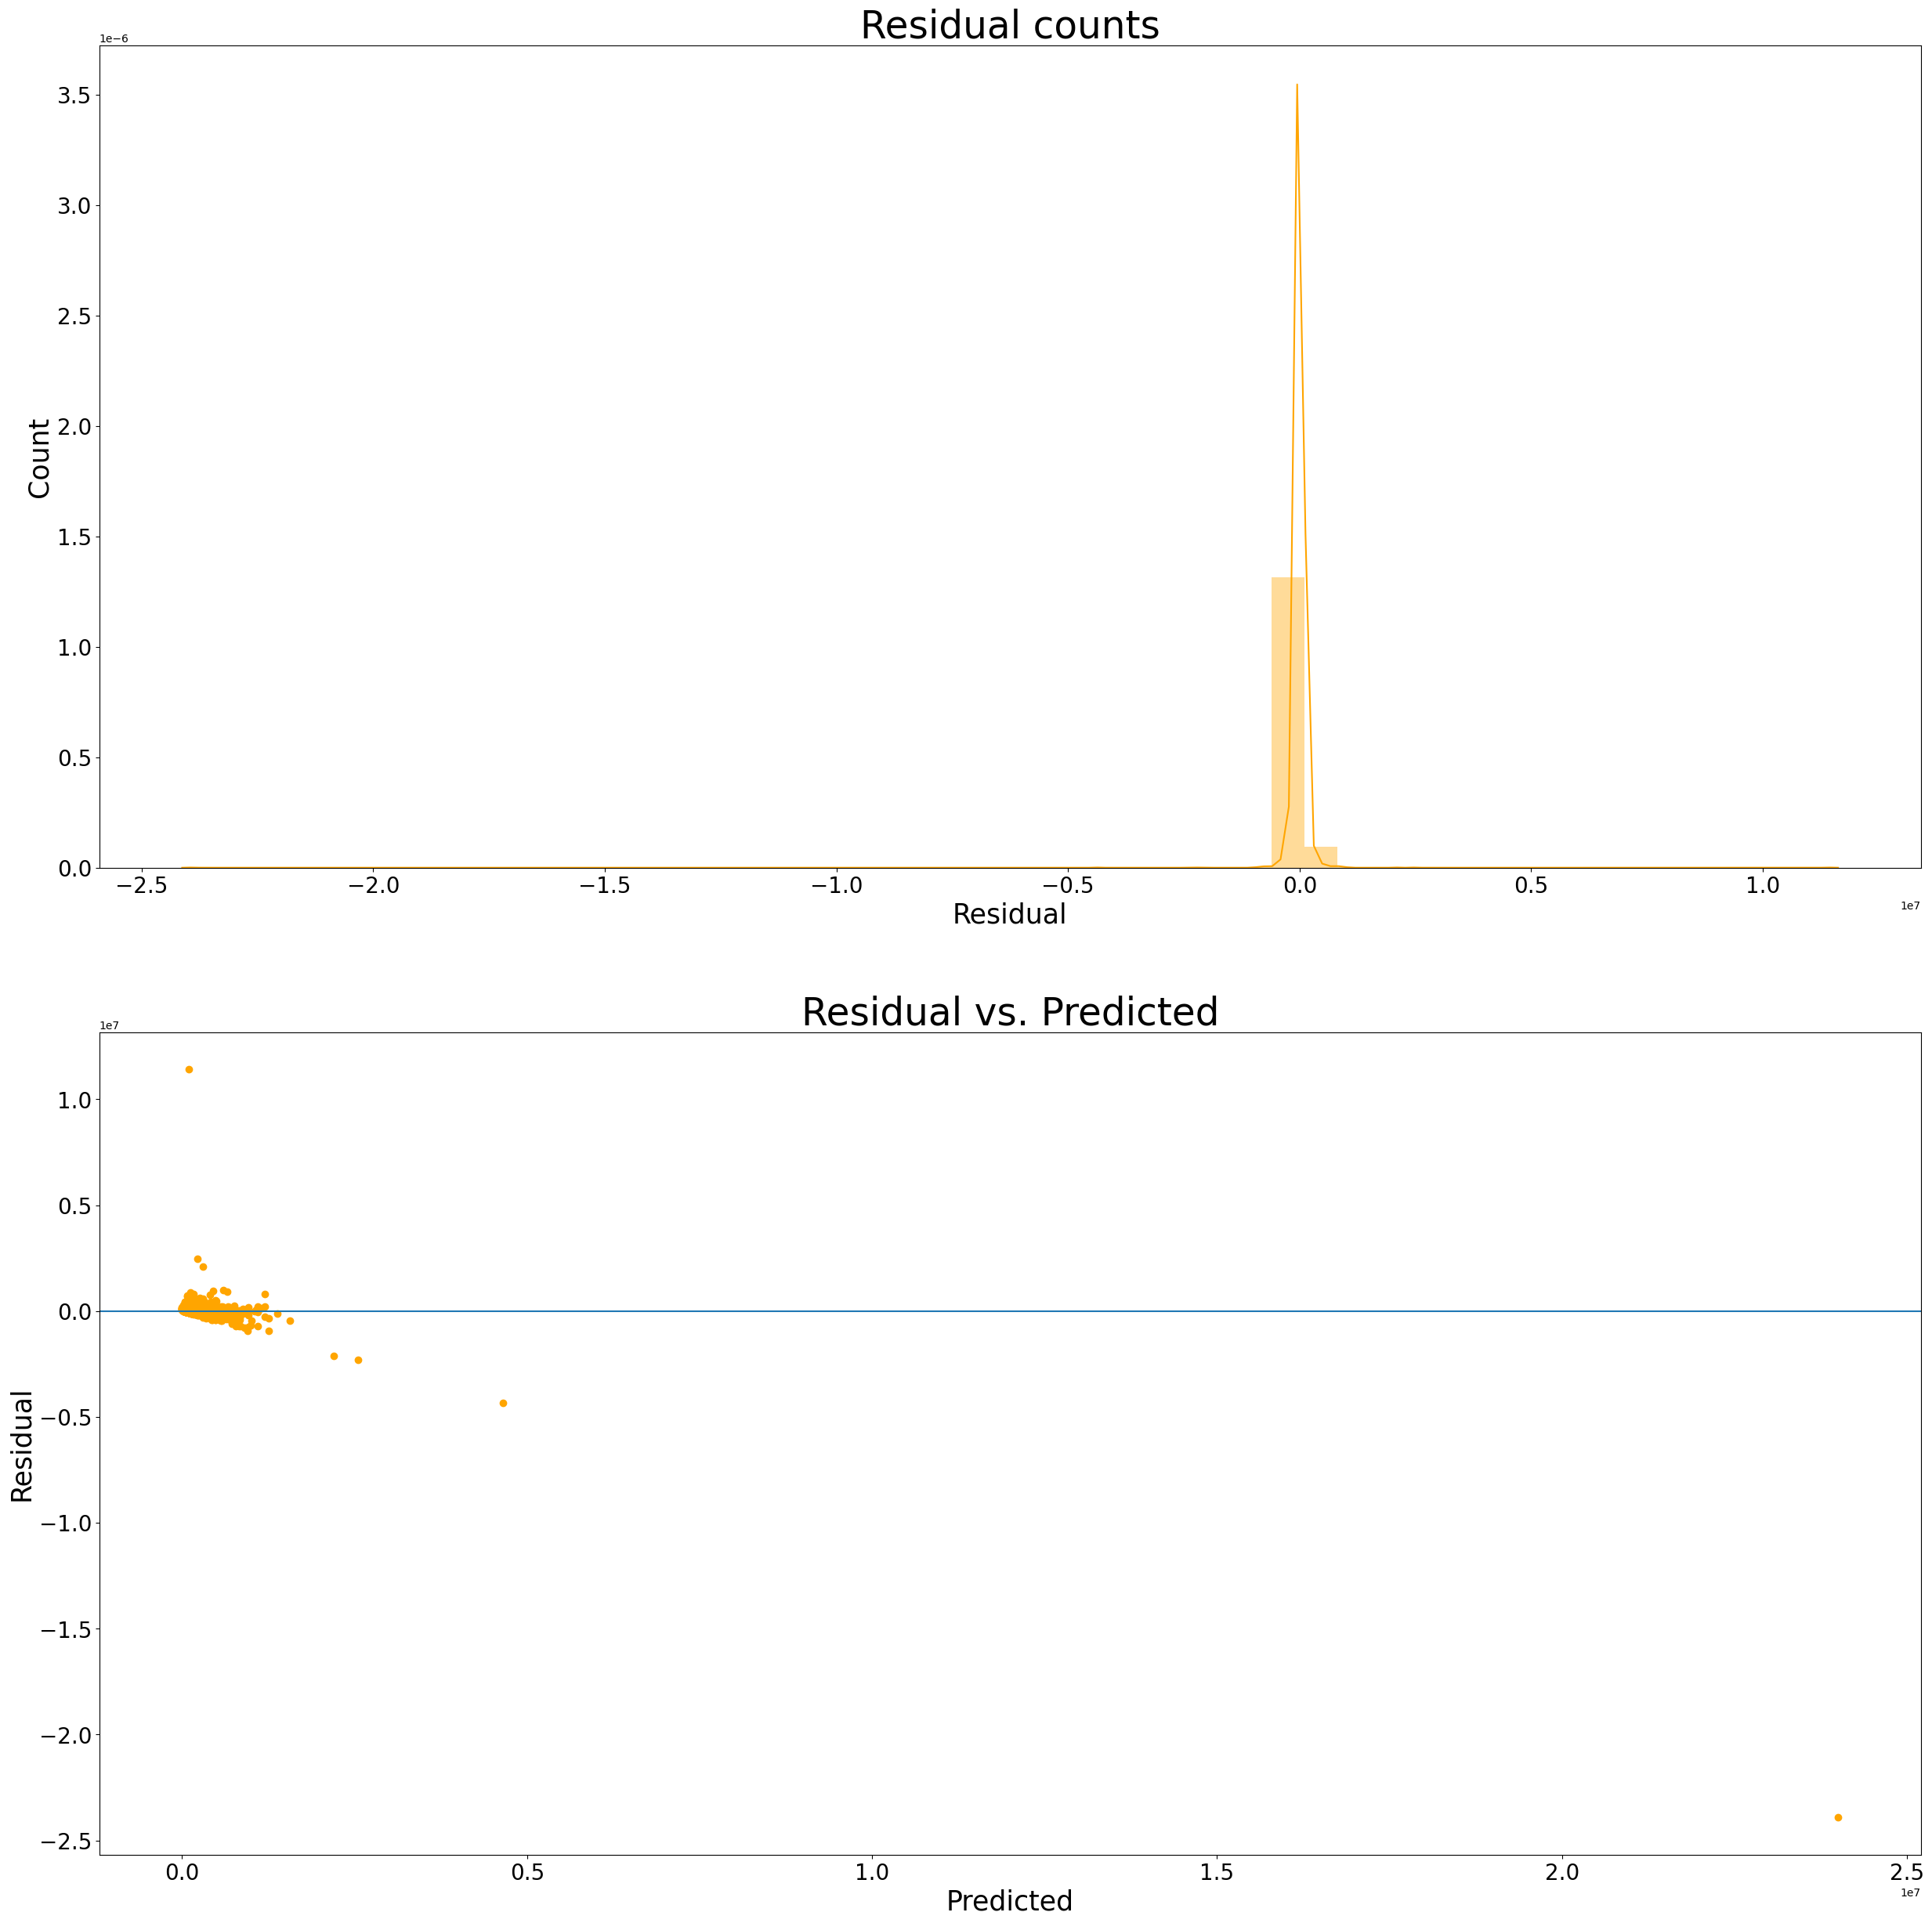

RMSE:
404772.6230758668
Variance score: -2.35


In [136]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features=None)
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

C:\Users\HA\AppData\Local\Temp\ipykernel_45392\413683510.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


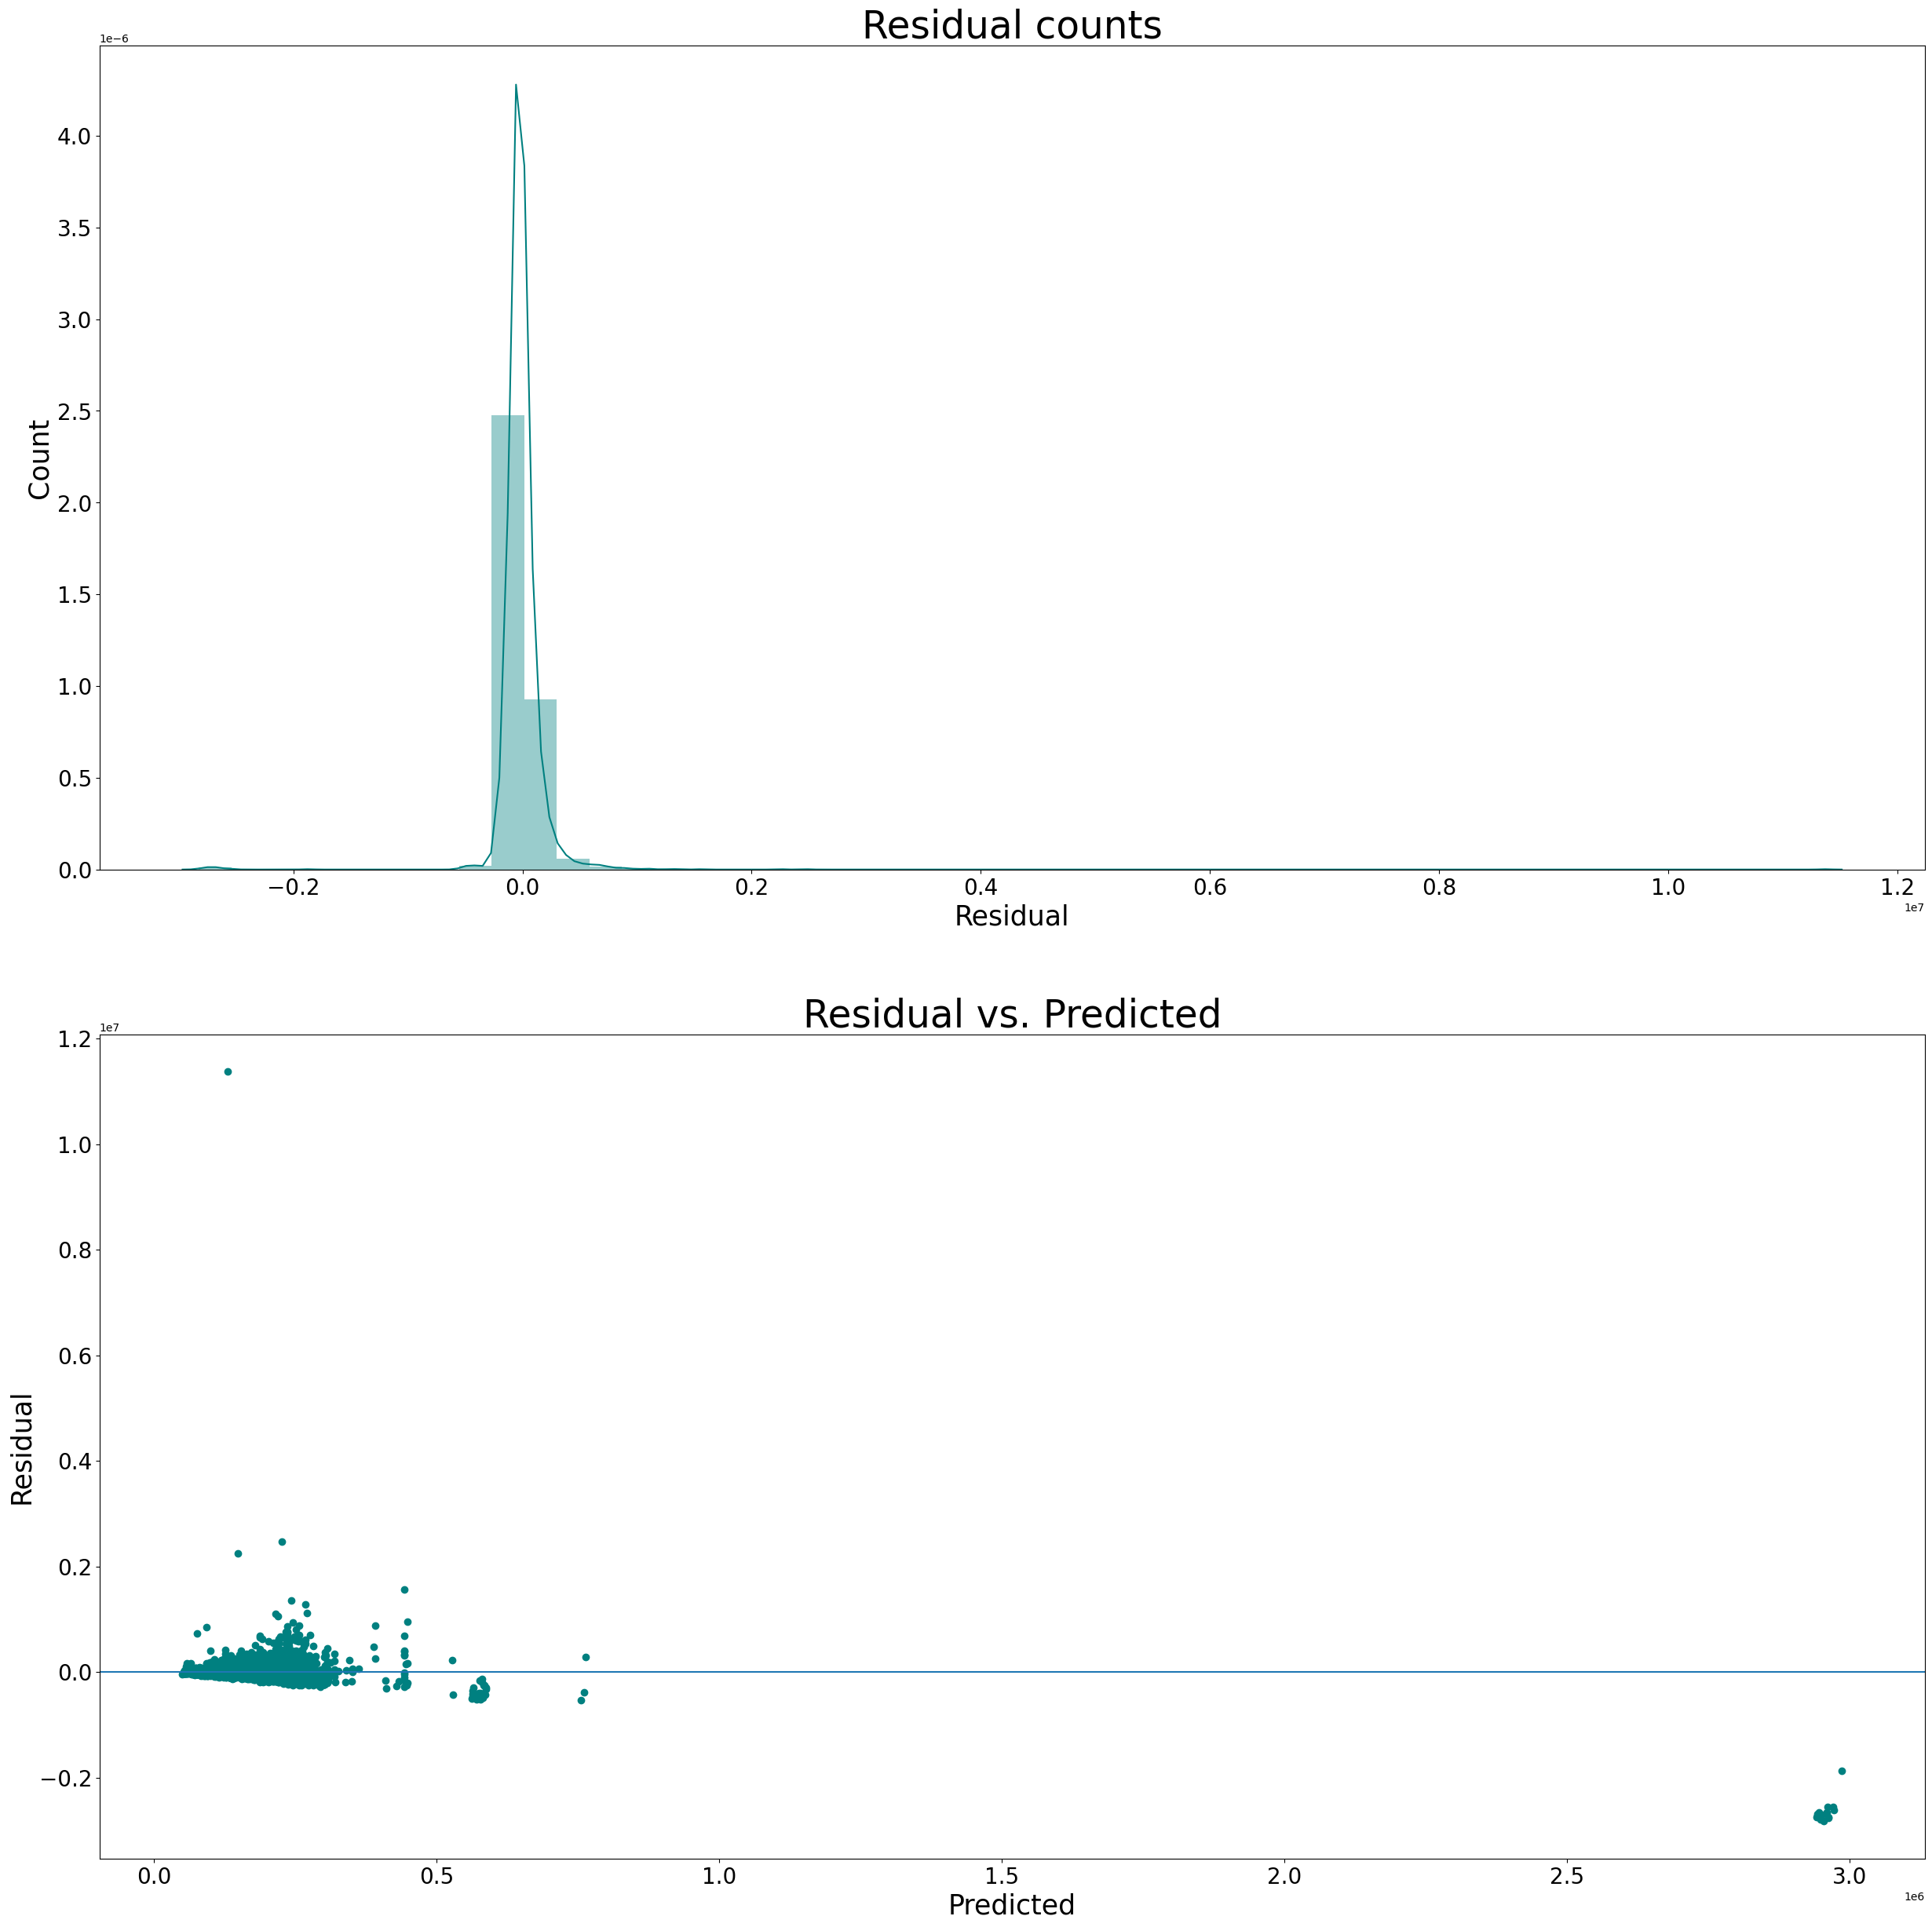

RMSE:
261808.62772470838
Variance score: -0.40


In [137]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=70)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [140]:
rmse_l = []
num = []
for n in range(1, 50):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

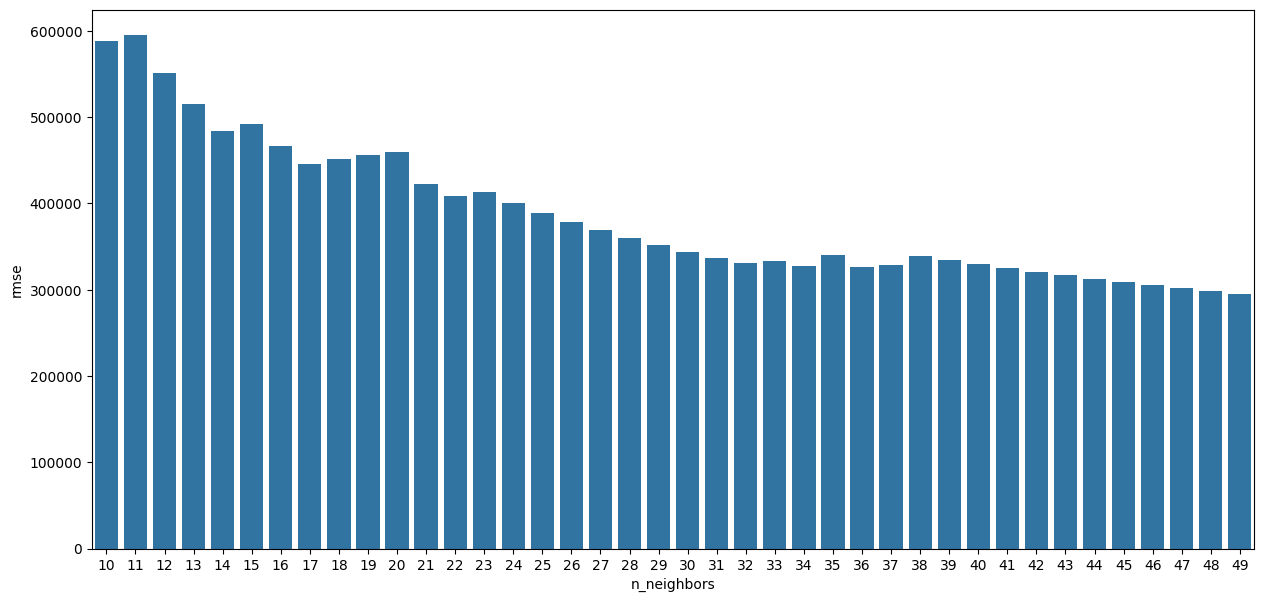

In [139]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()


Evaluating GradientBoostingRegressor...


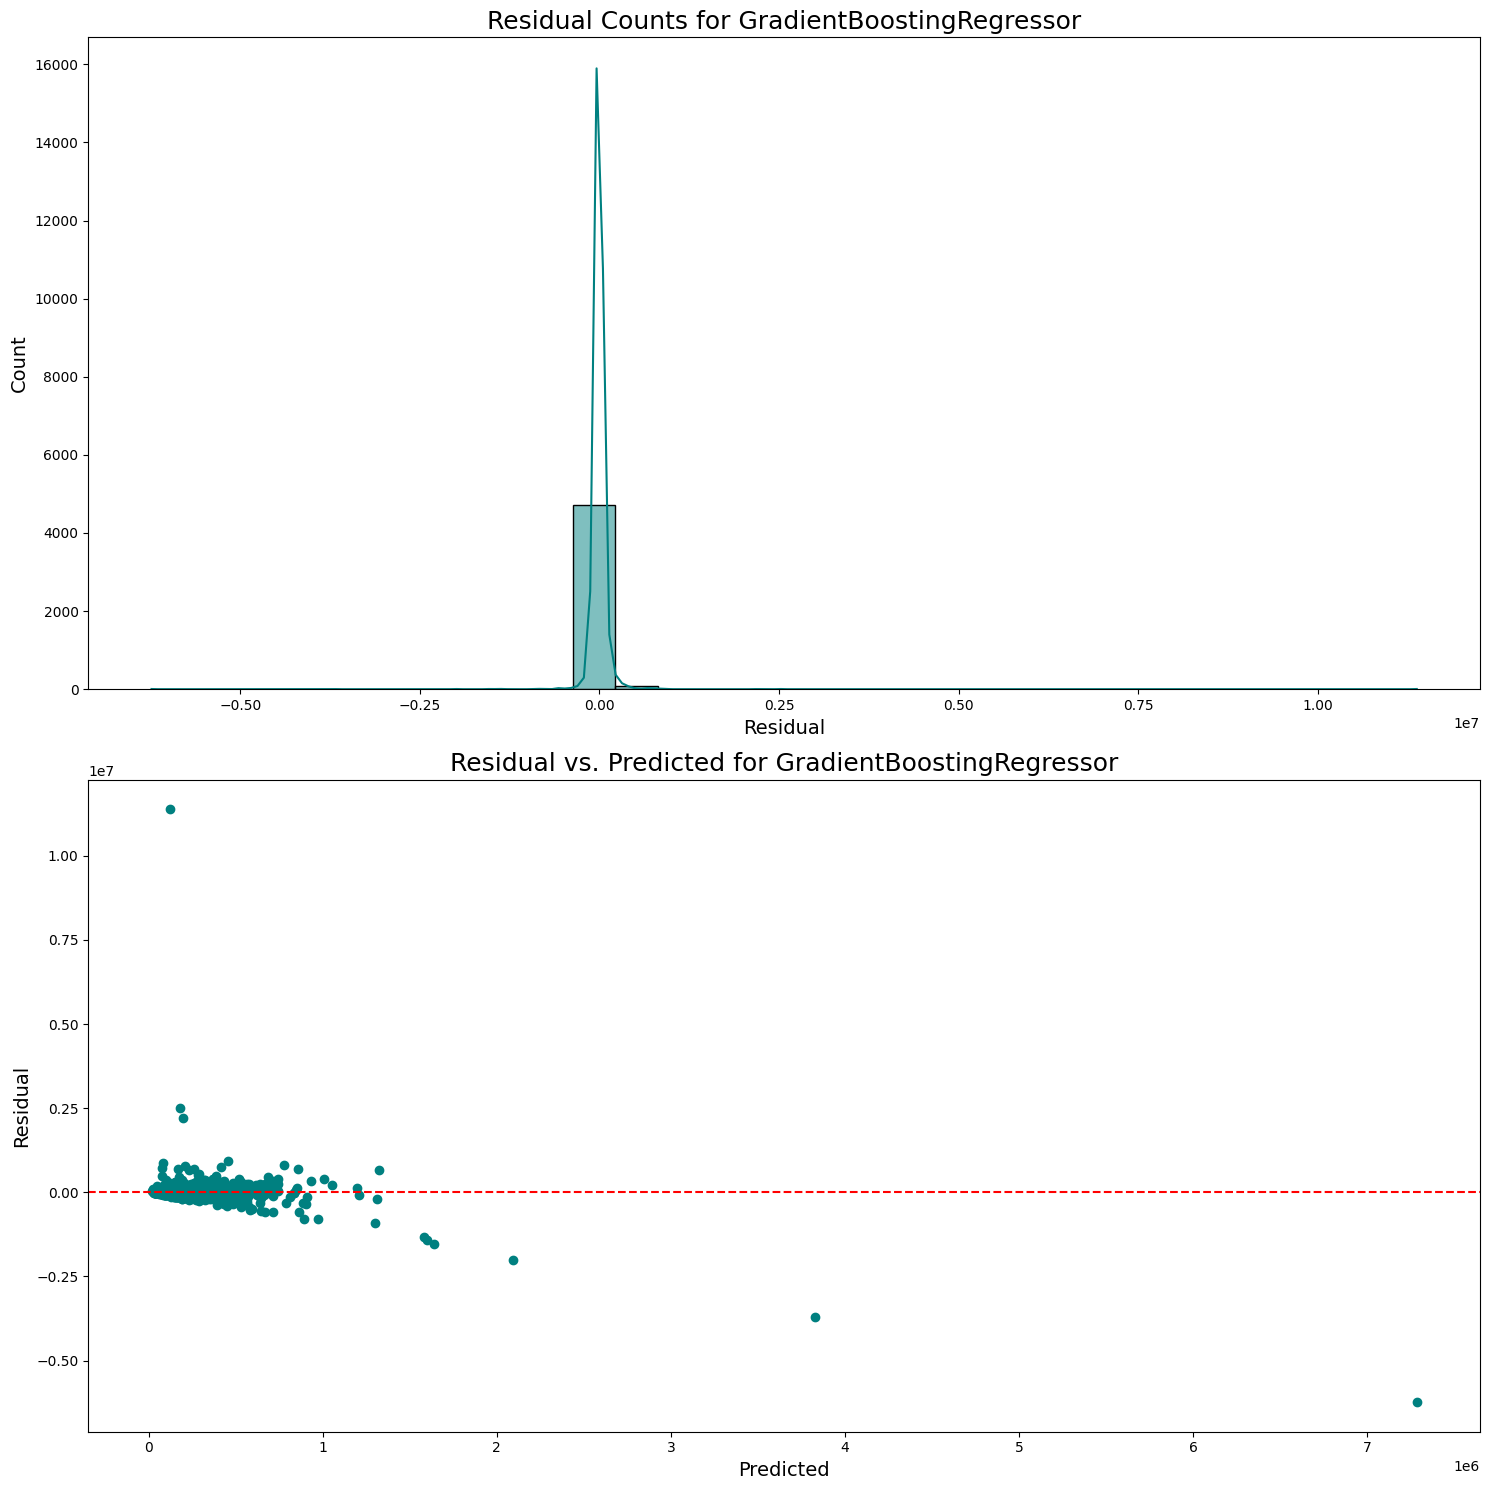


Cross Validation Scores:
[-5.26665159e-03  3.30883726e-02 -3.89877080e+02  3.32110044e-01
 -1.22139994e-02 -4.96353202e-01  9.14914318e-02  7.01755140e-01
 -2.65430407e+00  3.80873826e-01  1.96005874e-02 -1.50738162e+00]

Mean Cross Validation Score:
-32.749473318238145

Root Mean Squared Error (RMSE):
221476.6630320348

R² Score:
-0.00295634072428963

Evaluating RandomForestRegressor...


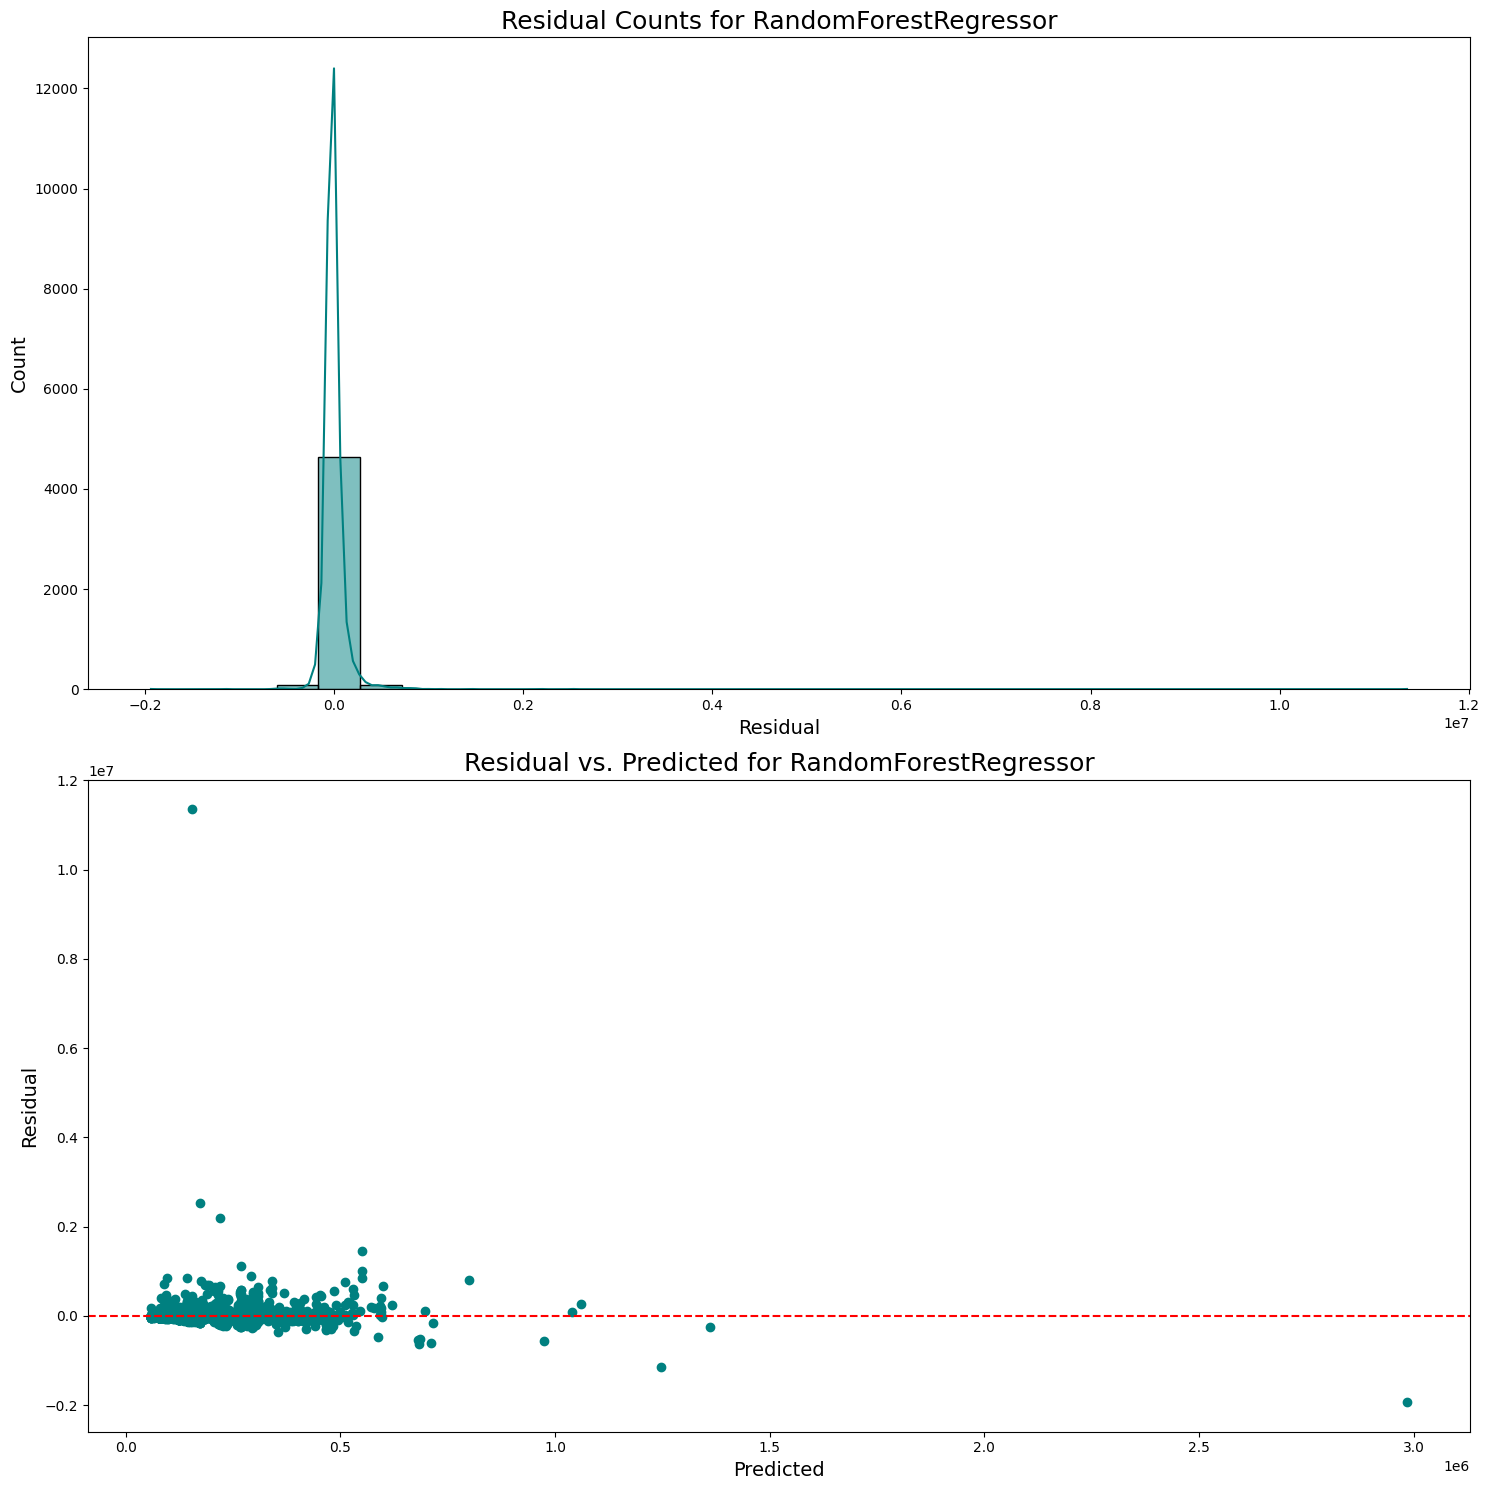


Cross Validation Scores:
[-1.98246288e-03  4.44129177e-02 -2.09982850e+02  4.17495005e-01
  5.73774741e-01  1.05178577e-01  6.98166969e-02  6.85450696e-01
 -7.76139845e-02  2.20971012e-01 -1.36750079e-02 -4.41834972e-01]

Mean Cross Validation Score:
-17.366738050264455

Root Mean Squared Error (RMSE):
201243.33038585927

R² Score:
0.17192613642823695

Evaluating AdaBoostRegressor...


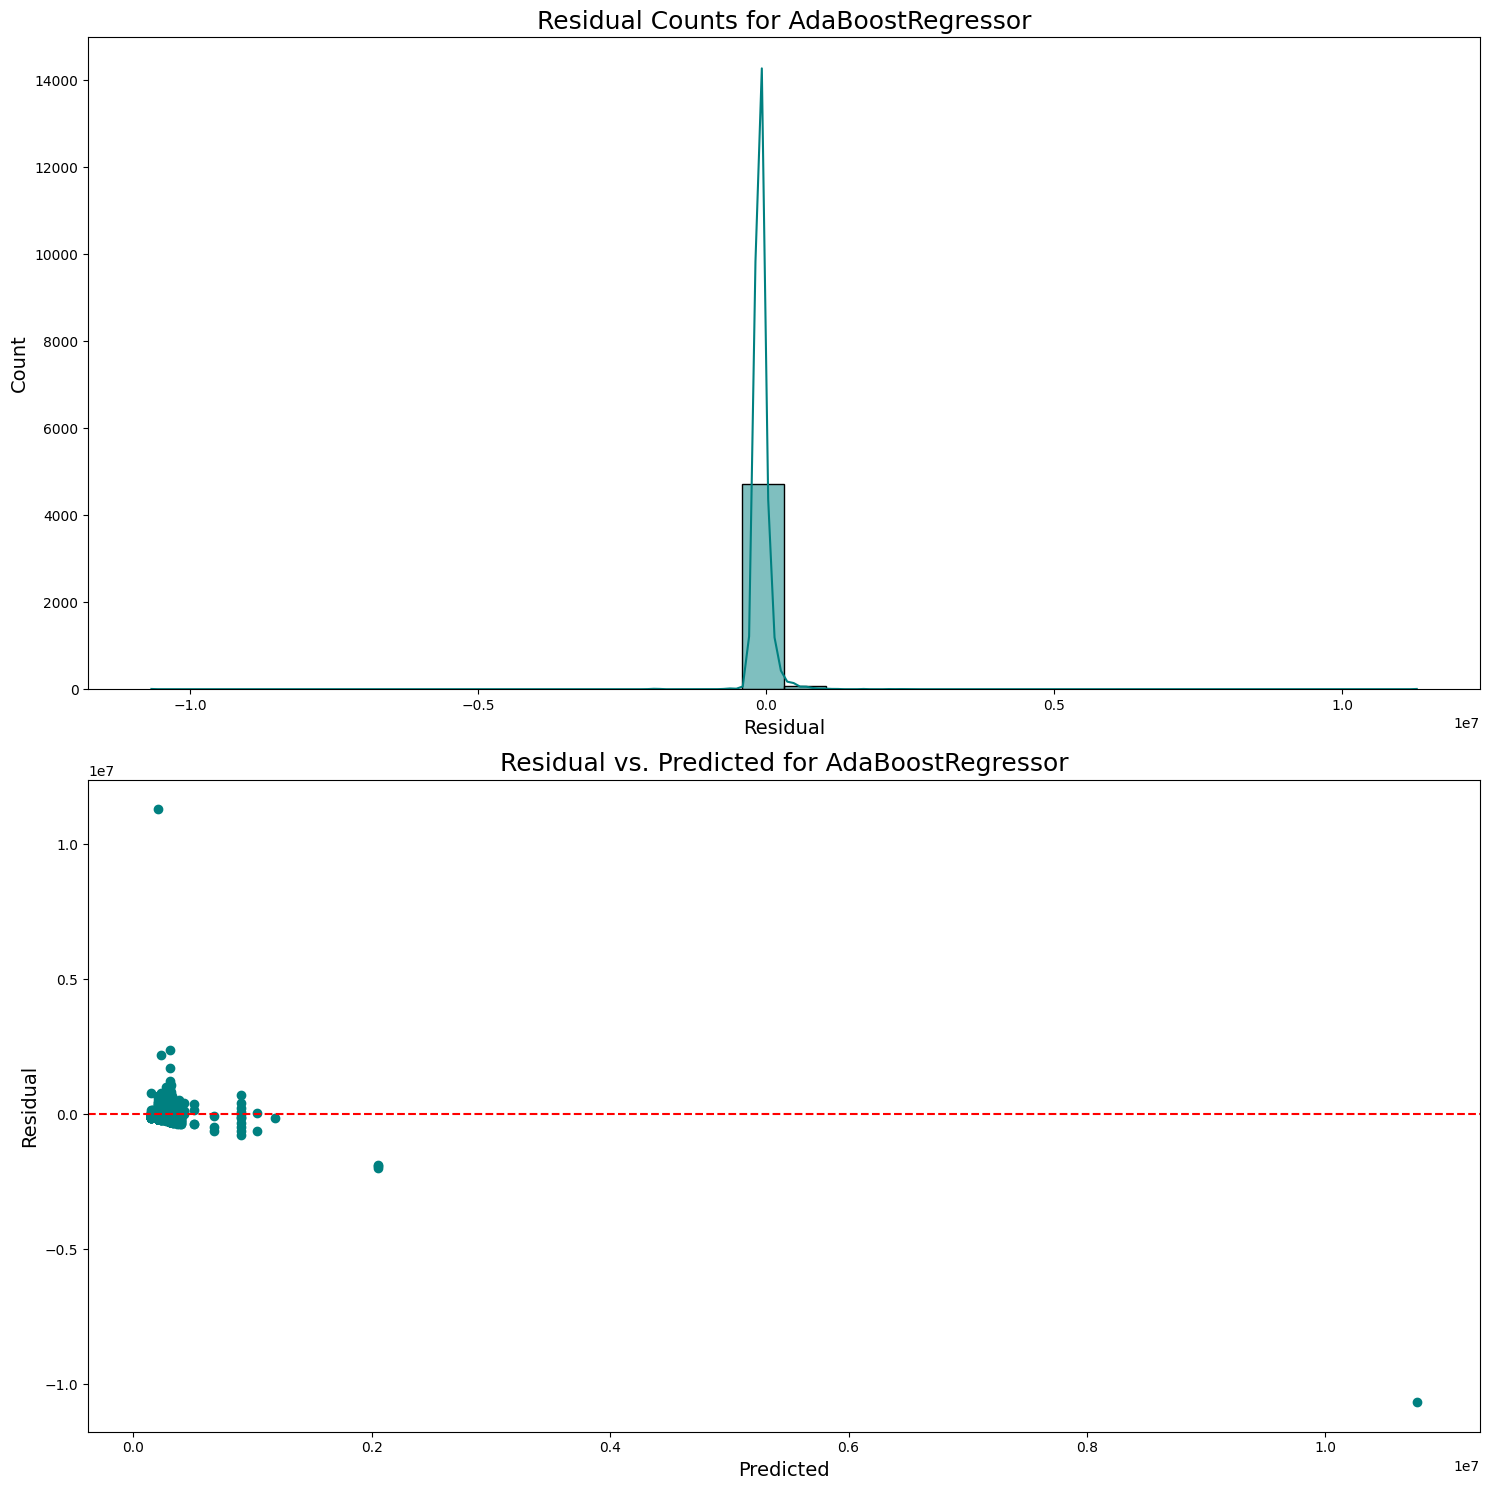


Cross Validation Scores:
[-3.05522784e-03  1.70286368e-02 -4.20729152e+02 -5.20944209e-01
 -6.29424116e+00 -1.43544928e+00 -5.46413566e-01 -5.89097167e+00
 -1.13387278e+00 -6.88661385e+00 -2.95472624e+00 -1.39589999e+01]

Mean Cross Validation Score:
-38.361450958417784

Root Mean Squared Error (RMSE):
277944.49449434894

R² Score:
-0.5795822231461767


In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

# Example dataset (replace with your own)


# Split data into train and test sets
# Define models to evaluate
models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(loss='squared_error', max_depth=6),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Loop through models and evaluate
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Train the model
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    residual = Y_test - predicted
    r2 = r2_score(Y_test, predicted)

    # Visualization of residuals
    fig = plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(211)
    sns.histplot(residual, kde=True, color='teal', bins=30)
    plt.title(f'Residual Counts for {name}', fontsize=18)
    plt.xlabel('Residual', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    ax2 = plt.subplot(212)
    plt.scatter(predicted, residual, color='teal')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual vs. Predicted for {name}', fontsize=18)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Residual', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Performance Metrics
    rmse = np.sqrt(mean_squared_error(Y_test, predicted))
    scores = cross_val_score(model, X, Y, cv=12)

    print('\nCross Validation Scores:')
    print(scores)
    print('\nMean Cross Validation Score:')
    print(scores.mean())
    print('\nRoot Mean Squared Error (RMSE):')
    print(rmse)
    print('\nR² Score:')
    print(r2)

In [78]:
if df.duplicated().any():
    print("Duplicates exist!")
    # Print the duplicate rows
    print(df[df.duplicated()])
else:
    print("No duplicates found.")

No duplicates found.


In [ ]:
X_train

C:\Users\HA\AppData\Local\Temp\ipykernel_45392\671131112.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


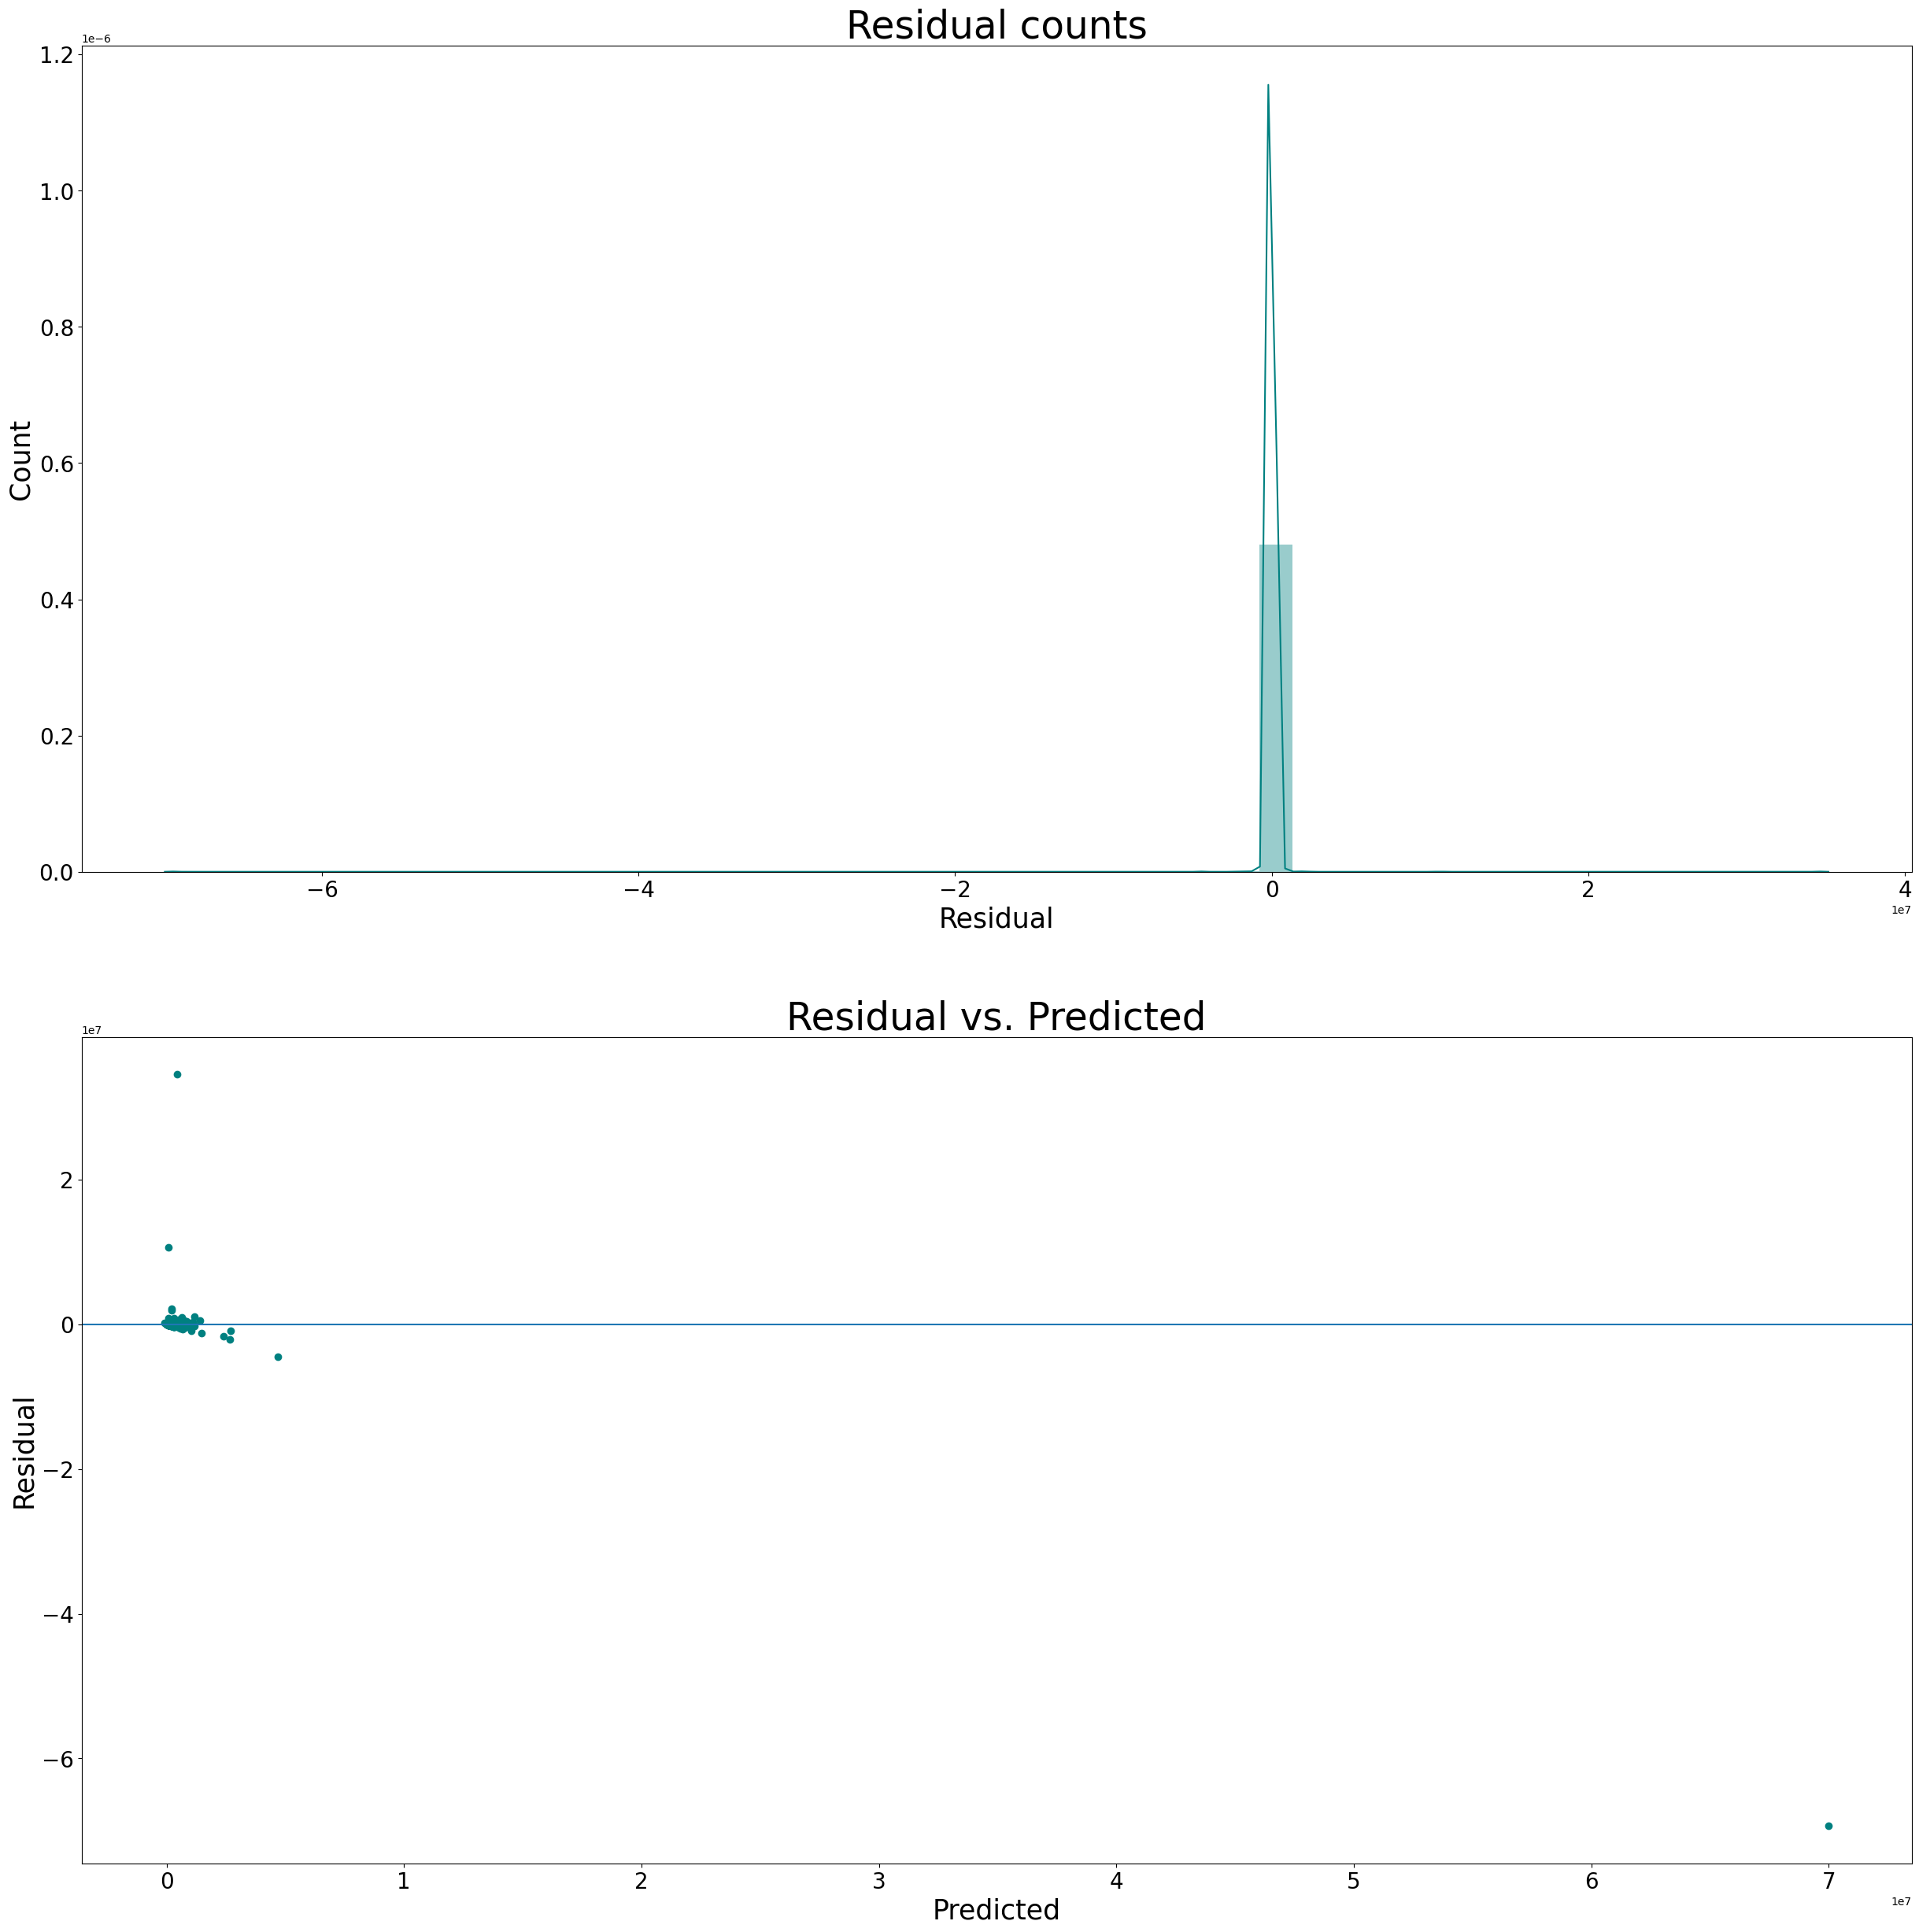


Cross Validation Scores:
[ 3.52648036e-03  5.18135801e-02 -5.15690446e-01  6.34441665e-01
 -7.28679519e-01 -2.73560814e+00  1.02659799e-01 -1.59091004e+02
  7.54065560e-01  3.85771841e-01  2.51406615e-02 -7.43535845e+00]

Mean Score:
-14.045743377061926

RMSE:
1131596.813896881

R² Score:
-3.310086107843566


In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss='squared_error', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)
r2 = r2_score(Y_test, predicted)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)
print('\nR² Score:')
print(r2)

In [106]:
A = Y_test.reshape(-1, 1)
B = predicted.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'

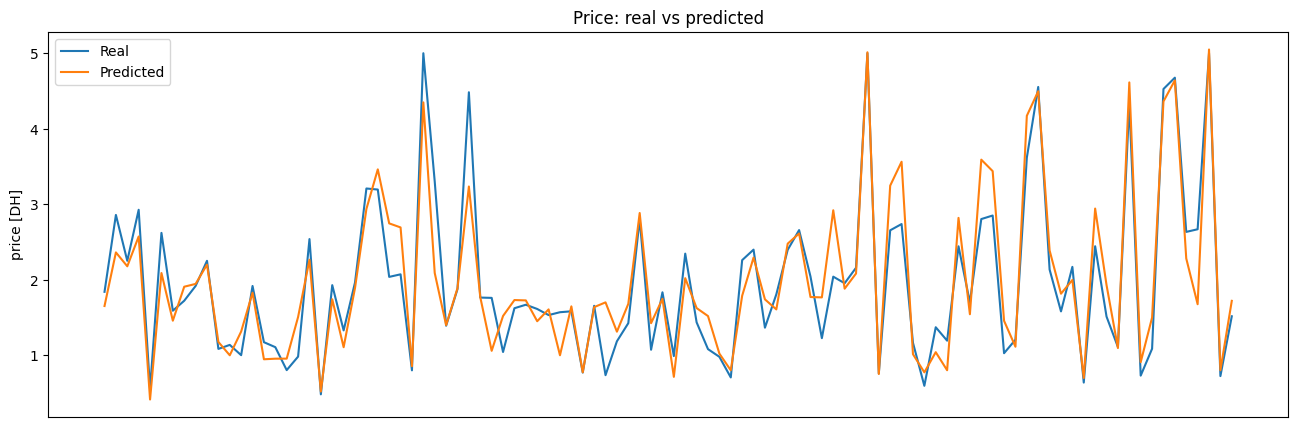

In [39]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price [DH]")
plt.xticks(())
plt.show()


On peut remarquer clairement que les deux courbes (réelle vs prédite) s'ajustent bien l'une à l'autre, avec quelques petites différences, ce qui nous permet de dire que nous avons réalisé une nette amélioration par rapport au premier modèle

In [72]:
X.shape[1]

992

In [90]:


def input_to_one_hot(data):
    enc_input = np.zeros(992)
    # set the numerical input as they are
    
    
    # Remplir les valeurs numériques
    enc_input[0] = data['Année']
    enc_input[1] = data['Kilométrage']
    enc_input[2] = data['Puissance fiscale']
    
    ##################### Marque #########################
    # Obtenir l'array des marques uniques
    marks = df['marque'].unique()
    # Redéfinir l'entrée utilisateur pour correspondre au format du nom de colonne (i.e., 'mark_X')
    redefinded_user_input = 'marque_' + data['marque']
    # Chercher l'index dans la liste des colonnes
    mark_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[mark_column_index] = 1
    
    ##################### Modèle #########################
    # De la même manière pour le modèle, en supposant que vous avez un encodage unique du modèle comme 'model_X'
    redefinded_user_input = 'modèle_' + data['modèle']
    
    model_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[model_column_index] = 1
    ##################### Carburant ######################
    # Obtenir l'array des types de carburant uniques
    fuel_types = df['Carburant'].unique()
    redefinded_user_input = 'Carburant_' + data['Carburant']
    # Chercher l'index dans la liste des colonnes

    fuelType_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[fuelType_column_index] = 1
    
    
    return enc_input


In [93]:
user_input = {
    'Année': 2006,
    'Kilométrage': 82499.5,
    'Puissance fiscale': 6,
    'Carburant': 'Diesel',
    'marque': 'Dacia',
    'modèle': 'Logan'
}

encoded_input = input_to_one_hot(user_input)

In [94]:
encoded_input

array([2.00600e+03, 8.24995e+04, 6.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [95]:
print(encoded_input)

[2.00600e+03 8.24995e+04 6.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.

In [80]:
gbr.fit (X_train, Y_train)

GradientBoostingRegressor(max_depth=6)

In [87]:
X_test



array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
          36.06      , -119.01      ],
       [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
          35.14      , -119.46      ],
       [   3.4801    ,   52.        ,    3.97715472, ...,    1.36033229,
          37.8       , -122.44      ],
       ...,
       [   9.2298    ,   25.        ,    7.23767606, ...,    2.79049296,
          37.31      , -122.05      ],
       [   2.785     ,   36.        ,    5.28902954, ...,    2.58860759,
          36.77      , -119.76      ],
       [   3.5521    ,   17.        ,    3.98883929, ...,    3.72991071,
          34.22      , -118.37      ]])

In [83]:
price_pred = gbr.predict([encoded_input])

ValueError: X has 992 features, but GradientBoostingRegressor is expecting 8 features as input.